In [2]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import seaborn as sns #### Library for plotting graphs. This is a layer on top of matplotlib
import matplotlib.pyplot as plt #### Basic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots

In [3]:
### Parsing the Date
dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%dT%H:%M:%SZ') for d in dates]

In [6]:
#### Loading the Data
data = pd.read_csv('https://raw.githubusercontent.com/rak3sh/ml-lab/master/data/noshow_appointments.csv', parse_dates=['AppointmentDay', 'ScheduledDay'], date_parser=dateparse)

In [7]:
### Seeing the First 10 Rows
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [5]:
#### Looking at the overall info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
NoShow            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [6]:
### Looking at the data
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Handling Erroneous Values
##### There seems to be some incorrect data with age. lets drop the rows with these values

In [7]:
##### There seems to be some incorrect data with age. lets drop the rows with these values
data = data.drop(data.index[data.Age <= 0],axis = 0)
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Feature Engineering 
##### The no of days between the scheduling day and the actual appointment day might be of importance.
##### The day of the week for the appointment day might also have some impact on the no show


In [8]:
#### The no of daysbetween the scheduling day and the actual appointment day might be of importance.
data['AppointmentDay'] = data['AppointmentDay'].dt.date
data['ScheduledDay'] = data['ScheduledDay'].dt.date
data['DateDiff'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

#### The day of the week for the appointment day might also have some impact on the no show
data['weekday'] = pd.to_datetime(data['AppointmentDay']).apply(lambda x: x.weekday())
data['scheduleday'] = pd.to_datetime(data['ScheduledDay']).apply(lambda x: x.weekday())
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,DateDiff,weekday,scheduleday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4,4
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2,4,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,4,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,4,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0,4,4
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2,4,2


In [9]:
#### Checking the data description again
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DateDiff,weekday,scheduleday
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264,10.166721,1.860441,1.855683
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725,15.263508,1.371457,1.378338
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,3.000000,3.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,5.000000,5.000000


In [10]:
#### There seem to be some records with a negative date difference, we can drop these as well
data = data.drop(data.index[data.DateDiff < 0],axis = 0)
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DateDiff,weekday,scheduleday
count,1.069820e+05,1.069820e+05,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,1.472785e+14,5.675434e+06,38.316315,0.101036,0.203782,0.074246,0.031407,0.022957,0.323279,10.167290,1.860463,1.855677
std,2.558181e+14,7.133426e+04,22.466023,0.301377,0.402811,0.262172,0.174416,0.164064,0.467730,15.263631,1.371467,1.378363
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173345e+12,5.640488e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.172598e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000
75%,9.433627e+13,5.725639e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,3.000000,3.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,5.000000,5.000000


### Feature Corelation

##### Lets create a Corelation Matrix using pandas inbuilt function and see how our features are corelated. Correlated features will not always worsen your model, but they will not always improve it either. Decision on Corelated features needs to be made based on the problem / data at hand.


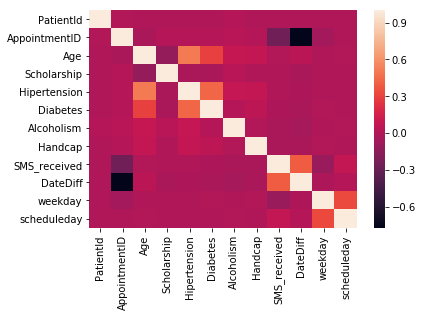

In [11]:
### Now Lets observe the Corelation Matrix
cormat = data.corr()
sns.heatmap(cormat, 
            xticklabels=cormat.columns.values,
            yticklabels=cormat.columns.values)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

### Handling Categorical Values

##### In this dataset we have the dependant variable being 'yes' or 'no', and 'M' or 'F' (Gender) lets convert it to 1 or 0

In [12]:
### In this dataset we have the dependant variable being 'yes' or 'no', lets convert it to 1 or 0
clean_up_categoricals = {'NoShow':{'Yes':1, 'No':0},
                         'Gender' :{"M":0, "F":1}}
data.replace(clean_up_categoricals, inplace=True)
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,DateDiff,weekday,scheduleday
0,2.987250e+13,5642903,1,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,4,4
1,5.589978e+14,5642503,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,4,4
2,4.262962e+12,5642549,1,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,4,4
3,8.679512e+11,5642828,1,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,4,4
4,8.841186e+12,5642494,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,4,4
5,9.598513e+13,5626772,1,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,2,4,2
6,7.336882e+14,5630279,1,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,2,4,2
7,3.449833e+12,5630575,1,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,2,4,2
8,5.639473e+13,5638447,1,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,0,4,4
9,7.812456e+13,5629123,1,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,2,4,2


### Next lets handle the neighbourhood categorical value

##### We can engineer a new value and replace it instead of the neighbourhood categorical value

In [13]:
#### First lets figure out how many neighbourhoods are there
count = data['Neighbourhood'].unique()
print((count))

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM'
 'JARDIM CAMBURI' 'MARIA ORTIZ' 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA'
 'ILHA DE SANTA MARIA' 'JUCUTUQUARA' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO'
 'BELA VISTA' 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ'
 'UNIVERSITÁRIO' 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO'
 'PARQUE MOSCOSO' 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA'
 'ARIOVALDO FAVALESSA' 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC'
 'CONSOLAÇÃO' 'SÃO BENEDITO' 'PRAIA DO CANTO' 'BOA VISTA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'MORADA DE CAMBURI' 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE'
 'JESUS DE NAZARETH' 'SANTA LUÍZA' 'SANTA TEREZA' 'CRUZAMENTO'
 'ILHA DO PRÍNCIPE' 'ROMÃO' 'ILHA DAS CAIEIRAS' 'COMDUSA' 'SANTA CECÍLI

In [27]:
#### Next lets analyse if Neighbourhood bears any effect on no show - lets get the number of no shows for a neighbourhood
#### and use it get the show percentage for the neighbourhoods

### First lets get the number of people that showed up for each of the neighbourhoods
show_true_count_nbd = data.query('NoShow == 0').groupby('Neighbourhood').Gender.count()

### Next lets get the number of total number of people for each neighbourhood
total_count_nbd = data.groupby('Neighbourhood').Gender.count()

### With the above data, we can Engineer a new value - Show percentage - for each
### neighbourhood and replace it in place of the categorical value 
show_percentage_nbd = (show_true_count_nbd/total_count_nbd)
print(show_true_count_nbd)
print(total_count_nbd)
print(show_percentage_nbd)

Neighbourhood
0.708567     885
0.729120     323
0.733871     364
0.736811    2514
0.751379    2043
0.763726    1697
0.764564    1903
0.768109    1686
0.771084     128
0.771247     971
0.772388     207
0.773529     789
0.774684     306
0.774803    1476
0.775335    1446
0.776207     659
0.777293     178
0.777497     615
0.778111     519
0.780809    1660
0.781135    1060
0.782120    1461
0.782297     327
0.785368    4369
0.788079     119
0.788150    1849
0.789153    2590
0.792693     998
0.793103     138
0.793576    3360
            ... 
0.813440     811
0.814286     114
0.815368    1475
0.815534     840
0.817429    2467
0.818616     343
0.818898     208
0.819699    1964
0.821146    1763
0.821429     253
0.821797    1116
0.822913    2198
0.824903     212
0.826087      57
0.827632    1234
0.828221     675
0.828660     532
0.831825    1103
0.832328     690
0.834751     687
0.837185    3224
0.839198    2552
0.840426      79
0.843284     452
0.850000     255
0.851770     385
0.855586     314


In [28]:
### Lets the get a list of Neighbourhoods and have them sorted alphabetically
count = data['Neighbourhood'].unique()
count = sorted(count)

#### So we have 81 neighbourhoods, lets use a for loop and replace these with show percentage for each
for i in range(0,len(count)):
    data.ix[data['Neighbourhood']==count[i],'Neighbourhood'] = show_percentage_nbd[count[i]]
    
data.ix[data['Neighbourhood'].isnull(),'Neighbourhood'] = 0
data.head(10)

C:\Rakesh\Programs\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Rakesh\Programs\anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,DateDiff,weekday,scheduleday
0,2.987250e+13,5642903,1,2016-04-29,2016-04-29,5,0.837185,0,1,0,0,0,0,0,1,4,4
1,5.589978e+14,5642503,0,2016-04-29,2016-04-29,5,0.837185,0,0,0,0,0,0,0,1,4,4
2,4.262962e+12,5642549,1,2016-04-29,2016-04-29,5,0.82866,0,0,0,0,0,0,0,1,4,4
3,8.679512e+11,5642828,1,2016-04-29,2016-04-29,1,0.826087,0,0,0,0,0,0,0,1,4,4
4,8.841186e+12,5642494,1,2016-04-29,2016-04-29,5,0.837185,0,1,1,0,0,0,0,1,4,4
5,9.598513e+13,5626772,1,2016-04-27,2016-04-29,5,0.828221,0,1,0,0,0,0,0,1,4,2
6,7.336882e+14,5630279,1,2016-04-27,2016-04-29,2,0.804665,0,0,0,0,0,0,1,1,4,2
7,3.449833e+12,5630575,1,2016-04-27,2016-04-29,4,0.804665,0,0,0,0,0,0,1,1,4,2
8,5.639473e+13,5638447,1,2016-04-29,2016-04-29,2,0.768109,0,0,0,0,0,0,0,1,4,4
9,7.812456e+13,5629123,1,2016-04-27,2016-04-29,2,0.812346,0,0,0,0,0,0,0,1,4,2


### Data Bucketisation or Data Binning
Grouping Continuos Data together into Bins / Buckets

##### In our dataset, the age is a continous feature that needs to be split into bins.

NoShow
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

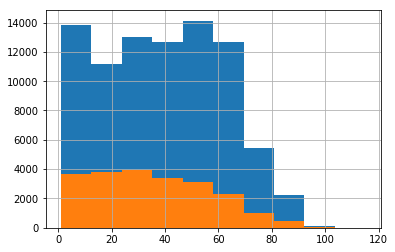

In [16]:
#### Lets explore how age has effect on no show
data.groupby('NoShow').Age.hist()

In [17]:
#### No Show rates seem to be lower for different age brackets and seem to be around 15% for 
#### 60+ / So lets Bin the ages into 4 groups - 0 - 5,5 - 14, 41 - 60, 61 +
age_bins = [-1,12,24,35,46,115]
group_names = [1,2,3,4,5]
out = pd.cut(data.Age, bins = age_bins, labels=group_names)
data['Age'] = out

In [18]:
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,DateDiff,weekday,scheduleday
0,2.987250e+13,5642903,1,2016-04-29,2016-04-29,5,0.837185,0,1,0,0,0,0,0,0,4,4
1,5.589978e+14,5642503,0,2016-04-29,2016-04-29,5,0.837185,0,0,0,0,0,0,0,0,4,4
2,4.262962e+12,5642549,1,2016-04-29,2016-04-29,5,0.82866,0,0,0,0,0,0,0,0,4,4
3,8.679512e+11,5642828,1,2016-04-29,2016-04-29,1,0.826087,0,0,0,0,0,0,0,0,4,4
4,8.841186e+12,5642494,1,2016-04-29,2016-04-29,5,0.837185,0,1,1,0,0,0,0,0,4,4
5,9.598513e+13,5626772,1,2016-04-27,2016-04-29,5,0.828221,0,1,0,0,0,0,0,2,4,2
6,7.336882e+14,5630279,1,2016-04-27,2016-04-29,2,0.804665,0,0,0,0,0,0,1,2,4,2
7,3.449833e+12,5630575,1,2016-04-27,2016-04-29,4,0.804665,0,0,0,0,0,0,1,2,4,2
8,5.639473e+13,5638447,1,2016-04-29,2016-04-29,2,0.768109,0,0,0,0,0,0,0,0,4,4
9,7.812456e+13,5629123,1,2016-04-27,2016-04-29,2,0.812346,0,0,0,0,0,0,0,2,4,2


NoShow
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DateDiff, dtype: object

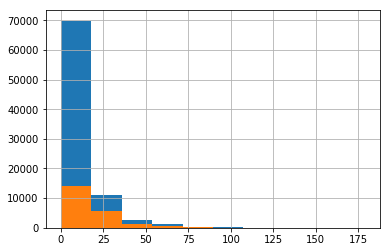

In [19]:
#### No Show rates seem to be lower when the difference between the scheduling date and the appointment date is less than
# 10
### We can bin these as well
data.groupby('NoShow').DateDiff.hist()

In [20]:
#### Creating Data difference bins
date_diff_bins = [-1,18,179]
group_names = [1,2]
out = pd.cut(data.DateDiff, bins = date_diff_bins, labels=group_names)
data['DateDiff'] = out

In [21]:
#### Checking if the values have been replaced
data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,DateDiff,weekday,scheduleday
0,2.987250e+13,5642903,1,2016-04-29,2016-04-29,5,0.837185,0,1,0,0,0,0,0,1,4,4
1,5.589978e+14,5642503,0,2016-04-29,2016-04-29,5,0.837185,0,0,0,0,0,0,0,1,4,4
2,4.262962e+12,5642549,1,2016-04-29,2016-04-29,5,0.82866,0,0,0,0,0,0,0,1,4,4
3,8.679512e+11,5642828,1,2016-04-29,2016-04-29,1,0.826087,0,0,0,0,0,0,0,1,4,4
4,8.841186e+12,5642494,1,2016-04-29,2016-04-29,5,0.837185,0,1,1,0,0,0,0,1,4,4
5,9.598513e+13,5626772,1,2016-04-27,2016-04-29,5,0.828221,0,1,0,0,0,0,0,1,4,2
6,7.336882e+14,5630279,1,2016-04-27,2016-04-29,2,0.804665,0,0,0,0,0,0,1,1,4,2
7,3.449833e+12,5630575,1,2016-04-27,2016-04-29,4,0.804665,0,0,0,0,0,0,1,1,4,2
8,5.639473e+13,5638447,1,2016-04-29,2016-04-29,2,0.768109,0,0,0,0,0,0,0,1,4,4
9,7.812456e+13,5629123,1,2016-04-27,2016-04-29,2,0.812346,0,0,0,0,0,0,0,1,4,2


In [22]:
#### Lets ensure our data doesnt contain any Null Values
nans = lambda data: data[data.isnull().any(axis=1)]
nans(data)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,DateDiff,weekday,scheduleday
